In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
engine = create_engine("sqlite:////Users/nathanieldirenzo/Documents/GitHub/NBM_EDA_Student/resources/get_mta/mta_data.db")

In [3]:
df = pd.read_sql('SELECT * FROM mta_data ORDER BY RANDOM() LIMIT 100000;', engine)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,R117,R343,00-00-00,FRANKLIN ST,1,IRT,11/11/2021,04:00:00,REGULAR,10483613,2265798
1,N120,R153,00-05-00,UTICA AV,AC,IND,06/15/2021,05:00:00,REGULAR,2891,0
2,B027,R136,00-00-00,SHEEPSHEAD BAY,BQ,BMT,02/25/2021,08:00:00,REGULAR,2204329,8952316
3,R510,R090,00-03-02,39 AV,NQW,BMT,08/13/2021,16:00:00,REGULAR,584889,147894
4,H005,R330,00-00-01,3 AV,L,BMT,04/26/2021,08:00:00,REGULAR,1460153,1904013


In [4]:
df = df.rename(columns={'C/A': 'control_area', 'UNIT': 'unit', 'SCP': 'subunit_channel_pos', 'STATION':'station', 'LINENAME':'subway_lines', 'DIVISION':'division', 'DATE':'date', 'TIME':'time', 'DESC':'desc', 'ENTRIES':'entries', 'EXITS':'exits'})

In [5]:
df= df.sort_values(by=['control_area', 'unit', 'subunit_channel_pos', 'station', 'date', 'time'])

In [6]:
df['date_time'] = df.date + ' ' + df.time

In [7]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time
69755,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2021,07:00:00,REGULAR,7519776,2562459,01/20/2021 07:00:00
76967,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2021,07:00:00,REGULAR,7520843,2562944,01/22/2021 07:00:00
59461,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2021,16:00:00,REGULAR,7548138,2575549,03/22/2021 16:00:00
37266,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,00:00:00,REGULAR,7551789,2577432,03/31/2021 00:00:00
1278,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,12:00:00,REGULAR,7551875,2577570,03/31/2021 12:00:00


In [8]:
df['net_entries'] = df.entries.diff()
df['net_exits'] = df.exits.diff()
df['net_traffic'] = df.entries.diff() + df.exits.diff()

In [9]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic
69755,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2021,07:00:00,REGULAR,7519776,2562459,01/20/2021 07:00:00,NaN,NaN,NaN
76967,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2021,07:00:00,REGULAR,7520843,2562944,01/22/2021 07:00:00,1067.0,485.0,1552.0
59461,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2021,16:00:00,REGULAR,7548138,2575549,03/22/2021 16:00:00,27295.0,12605.0,39900.0
37266,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,00:00:00,REGULAR,7551789,2577432,03/31/2021 00:00:00,3651.0,1883.0,5534.0
1278,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,12:00:00,REGULAR,7551875,2577570,03/31/2021 12:00:00,86.0,138.0,224.0


In [10]:
df.date_time = pd.to_datetime(df['date_time'])

In [11]:
df['audit_length_hours'] = df.date_time.diff() / pd.Timedelta(hours=1)

In [12]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic,audit_length_hours
69755,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2021,07:00:00,REGULAR,7519776,2562459,2021-01-20 07:00:00,NaN,NaN,NaN,NaN
76967,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2021,07:00:00,REGULAR,7520843,2562944,2021-01-22 07:00:00,1067.0,485.0,1552.0,48.0
59461,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2021,16:00:00,REGULAR,7548138,2575549,2021-03-22 16:00:00,27295.0,12605.0,39900.0,1425.0
37266,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,00:00:00,REGULAR,7551789,2577432,2021-03-31 00:00:00,3651.0,1883.0,5534.0,200.0
1278,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,12:00:00,REGULAR,7551875,2577570,2021-03-31 12:00:00,86.0,138.0,224.0,12.0


In [13]:
df['avg_hourly_entries'] = df['net_entries'] / df['audit_length_hours']
df['avg_hourly_exits'] = df['net_exits'] / df['audit_length_hours']
df['avg_hourly_traffic'] = df['net_traffic'] / df['audit_length_hours']

In [14]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic
69755,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2021,07:00:00,REGULAR,7519776,2562459,2021-01-20 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76967,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2021,07:00:00,REGULAR,7520843,2562944,2021-01-22 07:00:00,1067.0,485.0,1552.0,48.0,22.229167,10.104167,32.333333
59461,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2021,16:00:00,REGULAR,7548138,2575549,2021-03-22 16:00:00,27295.0,12605.0,39900.0,1425.0,19.154386,8.845614,28.000000
37266,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,00:00:00,REGULAR,7551789,2577432,2021-03-31 00:00:00,3651.0,1883.0,5534.0,200.0,18.255000,9.415000,27.670000
1278,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,12:00:00,REGULAR,7551875,2577570,2021-03-31 12:00:00,86.0,138.0,224.0,12.0,7.166667,11.500000,18.666667


In [15]:
df['pct_change_entries'] = df['net_entries'].pct_change() * 100
df['pct_change_exits'] = df['net_exits'].pct_change() * 100
df['pct_change_traffic'] = df['net_traffic'].pct_change() * 100

In [16]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,...,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic,pct_change_entries,pct_change_exits,pct_change_traffic
69755,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2021,07:00:00,REGULAR,7519776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76967,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2021,07:00:00,REGULAR,7520843,...,1067.0,485.0,1552.0,48.0,22.229167,10.104167,32.333333,NaN,NaN,NaN
59461,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/22/2021,16:00:00,REGULAR,7548138,...,27295.0,12605.0,39900.0,1425.0,19.154386,8.845614,28.000000,2458.106842,2498.969072,2470.876289
37266,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,00:00:00,REGULAR,7551789,...,3651.0,1883.0,5534.0,200.0,18.255000,9.415000,27.670000,-86.623924,-85.061484,-86.130326
1278,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2021,12:00:00,REGULAR,7551875,...,86.0,138.0,224.0,12.0,7.166667,11.500000,18.666667,-97.644481,-92.671269,-95.952295


In [17]:
df['turnstile_id_code'] = df.control_area + '_' + df.unit + '_' + df.subunit_channel_pos

In [18]:
df = df.drop(labels=['control_area', 'unit', 'subunit_channel_pos', 'division', 'date', 'time', 'desc', 'entries', 'exits'],axis=1)

In [19]:
df.head()

,station,subway_lines,date_time,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic,pct_change_entries,pct_change_exits,pct_change_traffic,turnstile_id_code
69755,59 ST,NQR456W,2021-01-20 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A002_R051_02-00-00
76967,59 ST,NQR456W,2021-01-22 07:00:00,1067.0,485.0,1552.0,48.0,22.229167,10.104167,32.333333,NaN,NaN,NaN,A002_R051_02-00-00
59461,59 ST,NQR456W,2021-03-22 16:00:00,27295.0,12605.0,39900.0,1425.0,19.154386,8.845614,28.000000,2458.106842,2498.969072,2470.876289,A002_R051_02-00-00
37266,59 ST,NQR456W,2021-03-31 00:00:00,3651.0,1883.0,5534.0,200.0,18.255000,9.415000,27.670000,-86.623924,-85.061484,-86.130326,A002_R051_02-00-00
1278,59 ST,NQR456W,2021-03-31 12:00:00,86.0,138.0,224.0,12.0,7.166667,11.500000,18.666667,-97.644481,-92.671269,-95.952295,A002_R051_02-00-00


In [20]:
cols = df.columns.tolist()
cols

['station',
 'subway_lines',
 'date_time',
 'net_entries',
 'net_exits',
 'net_traffic',
 'audit_length_hours',
 'avg_hourly_entries',
 'avg_hourly_exits',
 'avg_hourly_traffic',
 'pct_change_entries',
 'pct_change_exits',
 'pct_change_traffic',
 'turnstile_id_code']

In [21]:
df2 = pd.read_csv('DOITT_SUBWAY_STATION_01_13SEPT2010.csv')

In [22]:
cols = cols[-1:] + cols[:-1]
cols

['turnstile_id_code',
 'station',
 'subway_lines',
 'date_time',
 'net_entries',
 'net_exits',
 'net_traffic',
 'audit_length_hours',
 'avg_hourly_entries',
 'avg_hourly_exits',
 'avg_hourly_traffic',
 'pct_change_entries',
 'pct_change_exits',
 'pct_change_traffic']

In [23]:
df = df[cols]

In [24]:
df.head()

,turnstile_id_code,station,subway_lines,date_time,net_entries,net_exits,net_traffic,audit_length_hours,avg_hourly_entries,avg_hourly_exits,avg_hourly_traffic,pct_change_entries,pct_change_exits,pct_change_traffic
69755,A002_R051_02-00-00,59 ST,NQR456W,2021-01-20 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76967,A002_R051_02-00-00,59 ST,NQR456W,2021-01-22 07:00:00,1067.0,485.0,1552.0,48.0,22.229167,10.104167,32.333333,NaN,NaN,NaN
59461,A002_R051_02-00-00,59 ST,NQR456W,2021-03-22 16:00:00,27295.0,12605.0,39900.0,1425.0,19.154386,8.845614,28.000000,2458.106842,2498.969072,2470.876289
37266,A002_R051_02-00-00,59 ST,NQR456W,2021-03-31 00:00:00,3651.0,1883.0,5534.0,200.0,18.255000,9.415000,27.670000,-86.623924,-85.061484,-86.130326
1278,A002_R051_02-00-00,59 ST,NQR456W,2021-03-31 12:00:00,86.0,138.0,224.0,12.0,7.166667,11.500000,18.666667,-97.644481,-92.671269,-95.952295


In [42]:
nta_map = gpd.read_file('/Users/nathanieldirenzo/Documents/GitHub/NYC_MTA_EDA_Project/nynta2020.shp')
nta_map.head()
nta_map.to_crs(4326, inplace=True)
nta_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

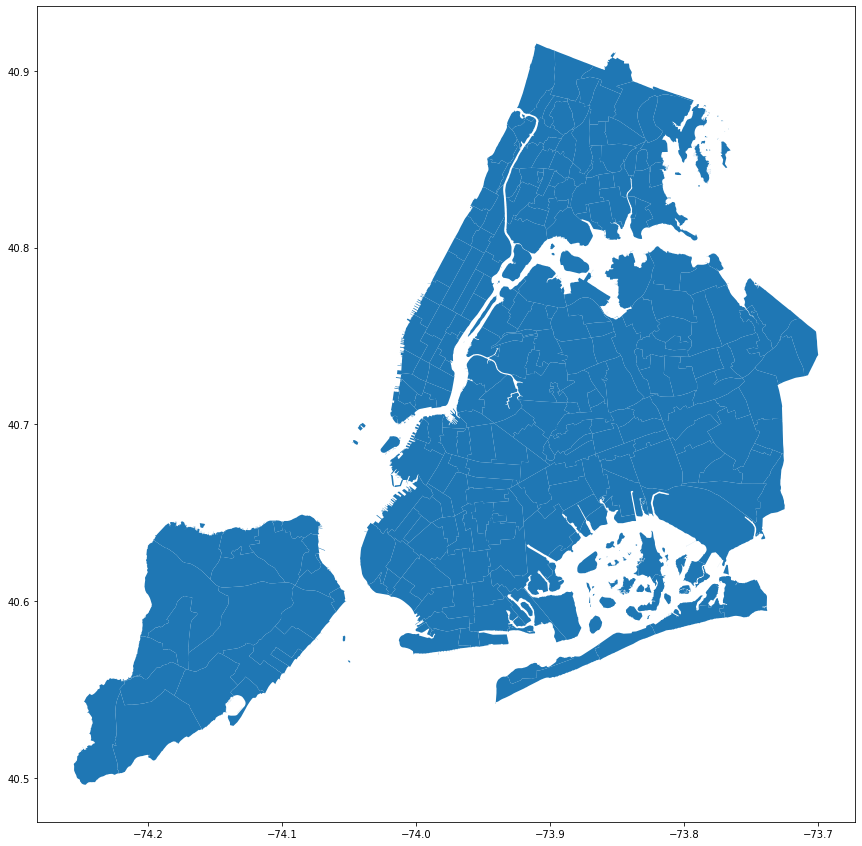

In [43]:
fig,ax = plt.subplots(figsize=(15,15))
nta_map.plot(ax=ax)

In [44]:
station_df = gpd.read_file('Subway Stations.geojson')
station_df

,name,url,line,objectid,notes,geometry
0,Astor Pl,http://web.mta.info/nyct/service/,4-6-6 Express,1,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-73.99107 40.73005)
1,Canal St,http://web.mta.info/nyct/service/,4-6-6 Express,2,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-74.00019 40.71880)
2,50th St,http://web.mta.info/nyct/service/,1-2,3,"1-all times, 2-nights",POINT (-73.98385 40.76173)
3,Bergen St,http://web.mta.info/nyct/service/,2-3-4,4,"4-nights, 3-all other times, 2-all times",POINT (-73.97500 40.68086)
4,Pennsylvania Ave,http://web.mta.info/nyct/service/,3-4,5,"4-nights, 3-all other times",POINT (-73.89489 40.66471)
...,...,...,...,...,...,...
468,Coney Island - Stillwell Av,http://web.mta.info/nyct/service/,D-F-N-Q,469,"D,F,N,Q-all times",POINT (-73.98124 40.57728)
469,34th St - Hudson Yards,http://web.mta.info/nyct/service/,7-7 Express,470,"7-all times, 7 Express-rush hours AM westbound...",POINT (-74.00220 40.75545)
470,72nd St,http://web.mta.info/nyct/service/,Q,641,Q-all times,POINT (-73.95836 40.76880)
471,86th St,http://web.mta.info/nyct/service/,Q,642,Q-all times,POINT (-73.95177 40.77786)


In [45]:
station_df.head()

,name,url,line,objectid,notes,geometry
0,Astor Pl,http://web.mta.info/nyct/service/,4-6-6 Express,1,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-73.99107 40.73005)
1,Canal St,http://web.mta.info/nyct/service/,4-6-6 Express,2,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-74.00019 40.71880)
2,50th St,http://web.mta.info/nyct/service/,1-2,3,"1-all times, 2-nights",POINT (-73.98385 40.76173)
3,Bergen St,http://web.mta.info/nyct/service/,2-3-4,4,"4-nights, 3-all other times, 2-all times",POINT (-73.97500 40.68086)
4,Pennsylvania Ave,http://web.mta.info/nyct/service/,3-4,5,"4-nights, 3-all other times",POINT (-73.89489 40.66471)


In [46]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in station_df['geometry']]
geometry[:3]

In [48]:
geo_df = gpd.GeoDataFrame(df2, geometry=geometry)
geo_df.head()
geo_df = geo_df.set_crs('EPSG:4326')
#nta_map['data_norm'] = nta_map['geometry']/nta_map.area

<AxesSubplot:>

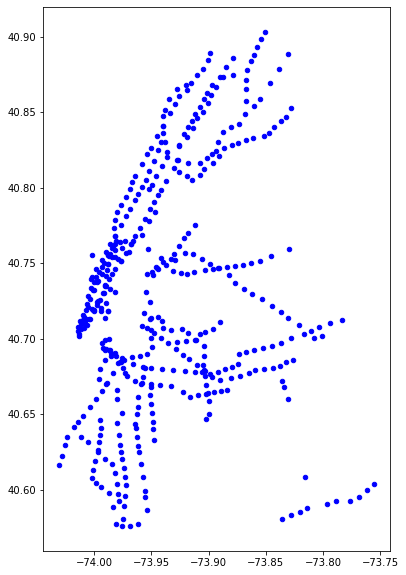

In [49]:
fig,ax = plt.subplots(figsize=(10,10))
geo_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Station')

<AxesSubplot:>

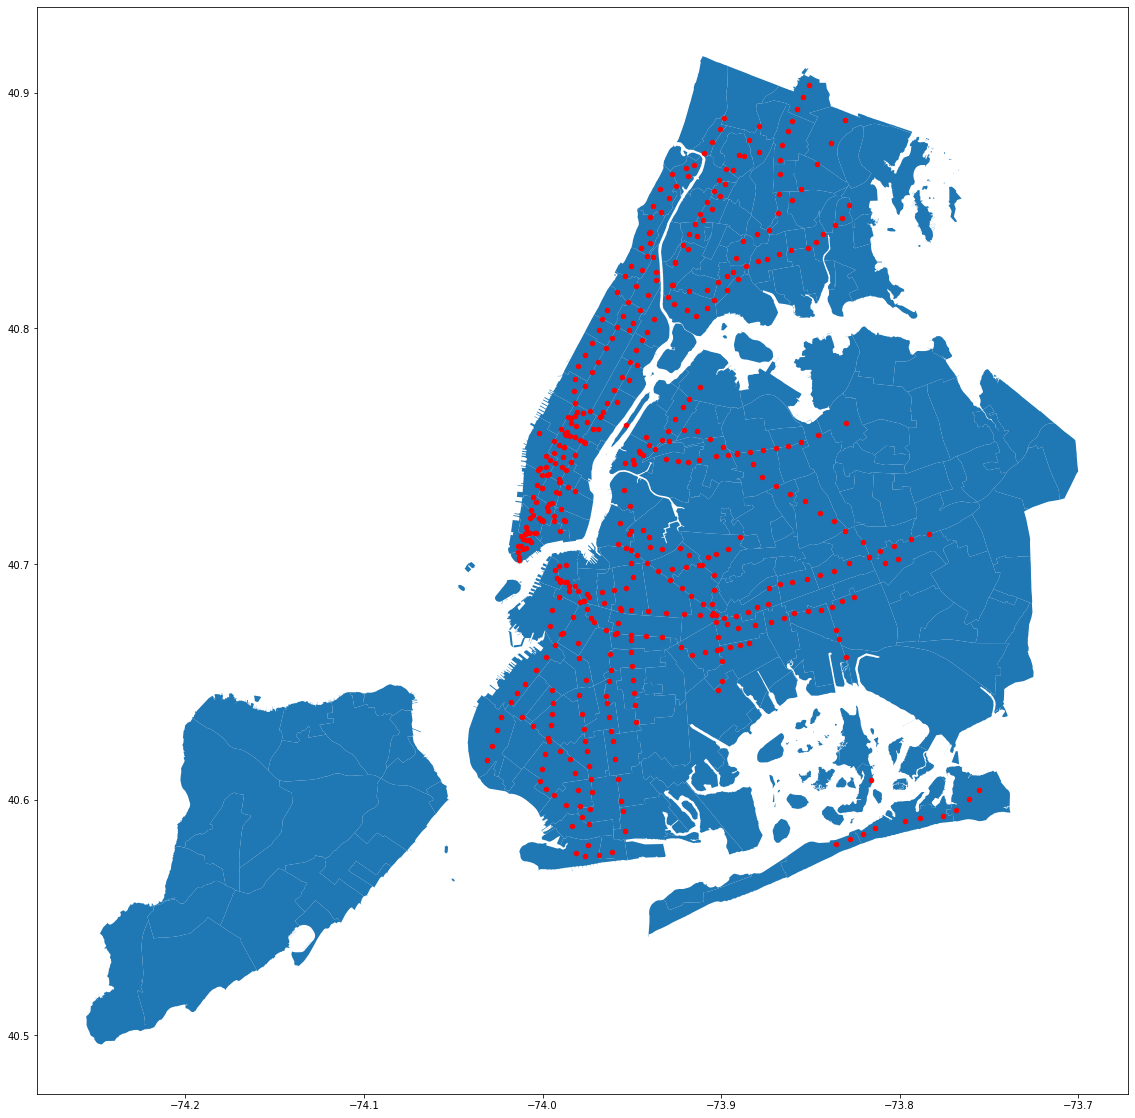

In [60]:
fig,ax = plt.subplots(figsize=(20,20))
nta_map.plot(ax=ax,)
geo_df.plot(ax=ax, markersize=20, color='red', marker='o', label = 'Station')